In [1]:
'''This notebook shos how to load a StackPool and make simple analysis and plots'''

from bMapManager import bStackPool

filePath = 'data/tian_merged.txt'
sp = bStackPool(filePath)

In [19]:
import pandas as pd
import numpy as np

spines_df = sp.getSpines()

#fn to get list of unique stack names
#stackNameList = spines_df.stackName.unique()

#pivot table to plot mean sLen2d for (each stack, each segment)
piv = pd.pivot_table( spines_df, index=['stackName','parentID'], values = ['sLen2d_ch1'], aggfunc=[np.mean,np.std,np.count_nonzero])
piv.stack()

#stats for ubssSum_ch1
piv = pd.pivot_table( spines_df, index=['stackName','parentID'], values = ['ubssSum_ch1'], aggfunc=[np.mean,np.std,np.count_nonzero])
piv.stack()


mean           std  count_nonzero
stackName  parentID                                                       
Kibra_10_1 0        ubssSum_ch1  18810.623377   8819.996817             77
Kibra_10_2 0        ubssSum_ch1  12875.770492   8475.070878             61
Kibra_10_3 0        ubssSum_ch1  23116.091954  17712.908483             88
Kibra_10_4 0        ubssSum_ch1  17278.906667   7748.932096             76
Kibra_10_5 0        ubssSum_ch1  25040.141414  26395.626681            100
Kibra_10_6 0        ubssSum_ch1  22687.342593  20516.428801            111
Kibra_2_1  0        ubssSum_ch1  23047.300000  12243.935223             90
Kibra_2_2  0        ubssSum_ch1   7209.518987   3859.921096             79
Kibra_2_3  0        ubssSum_ch1  19569.815534  10163.174628            105
Kibra_2_4  0        ubssSum_ch1  24311.712644  12613.100407             88
Kibra_2_5  0        ubssSum_ch1  10011.500000   5675.640879             85
Kibra_6_2  0        ubssSum_ch1           NaN           NaN             93
Kibra_6_3  0        ubssSum_ch1           NaN           NaN             51
Kibra_6_4  0        ubssSum_ch1           NaN           NaN             46
Kibra_6_5  0        ubssSum_ch1           NaN           NaN             79
Kibra_6_6  0        ubssSum_ch1           NaN           NaN             67
Kibra_9_1  0        ubssSum_ch1           NaN           NaN             91
Kibra_9_2  0        ubssSum_ch1           NaN           NaN             75
Kibra_9_3  0        ubssSum_ch1           NaN           NaN             88
Kibra_9_4  0        ubssSum_ch1           NaN           NaN             80
Kibra_9_5  0        ubssSum_ch1           NaN           NaN             93
Kibra_9_6  0        ubssSum_ch1           NaN           NaN             85
X410       0        ubssSum_ch1           NaN           NaN            107


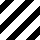
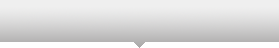
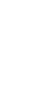
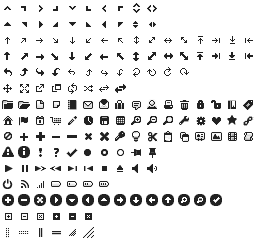
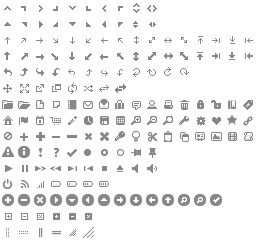
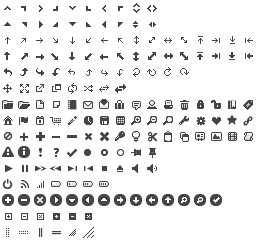
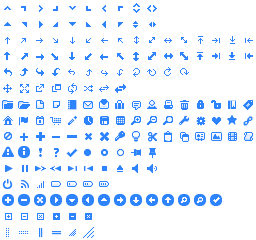
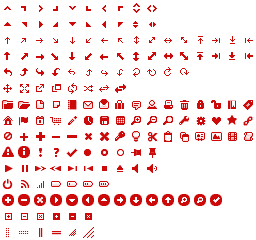
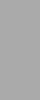
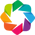
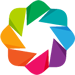
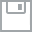
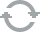
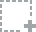
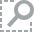
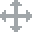
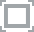
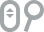

In [20]:
#plot x/y of all spines
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = figure()
p.circle(spines_df.x, spines_df.y)
show(p)



In [26]:
#use spines_df as a common data model across plots
#this allows spine selection in one plot to be selected in all plots

from bokeh.models import ColumnDataSource
from bokeh.plotting import gridplot

source = ColumnDataSource(data=spines)

TOOLS = "box_select,lasso_select,box_zoom,pan,reset,resize,wheel_zoom,help"

plotRow1 = []
plotRow2 = []

# create a new plot and add a renderer
xStat = 'x'
yStat = 'y'
f = figure(tools=TOOLS, width=300, height=300, title=None, x_axis_label=xStat, y_axis_label=yStat)
f.circle(xStat, yStat, source=source)
plotRow1.append(f)

xStat = 'sSum_ch1'
yStat = 'sLen2d_ch1'
f = figure(tools=TOOLS, width=300, height=300, title=None, x_axis_label=xStat, y_axis_label=yStat)
f.circle(xStat, yStat, source=source)
plotRow1.append(f)

xStat = 'dSum_ch1'
yStat = 'sSum_ch1'
f = figure(tools=TOOLS, width=300, height=300, title=None, x_axis_label=xStat, y_axis_label=yStat)
f.circle(xStat, yStat, source=source)
plotRow1.append(f)

# create another new plot and add a renderer
xStat = 'parentID' #to do: put stackIdx column in output .txt file
yStat = 'pDist'
f = figure(tools=TOOLS, width=300, height=300, title=None, x_axis_label=xStat, y_axis_label=yStat)
f.circle(xStat, yStat, source=source)
plotRow2.append(f)

'''
http://bokeh.pydata.org/en/0.11.1/docs/user_guide/interaction.html
'''
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.io import vform

columns = [
        TableColumn(field="roiType", title="roiType"),
        TableColumn(field="x", title="xTitle"),
        TableColumn(field="y", title="yTitle"),
        TableColumn(field="z", title="zTitle"),
        TableColumn(field="sLen2d_ch1", title="sLen2d"),
        TableColumn(field="sSum_ch1", title="sSum"),
        TableColumn(field="dSum_ch2", title="dSum"),
    ]

data_table = DataTable(source=source, columns=columns, width=400, height=280)

p = gridplot([plotRow1, plotRow2])

layout = vform(data_table, p)

show(layout)
